In [91]:
import pandas as pd

In [93]:
amazon = pd.read_csv('amazon_reviews.csv')

In [94]:
amazon.isna().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [95]:
amazon.dropna(inplace=True)

print(amazon.isna().sum())

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [98]:
amazon.dtypes

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [101]:
# create new csv file with only overall and reviewText columns
review_rating = amazon[["overall", "reviewText"]]
review_rating.to_csv("assignment_1.csv", index=False)

In [103]:
assignment1 = pd.read_csv('assignment_1.csv')

In [105]:
# change reviewText data type to string
assignment1["reviewText"] = assignment1["reviewText"].astype("string")
print(assignment1.dtypes)

overall              float64
reviewText    string[python]
dtype: object


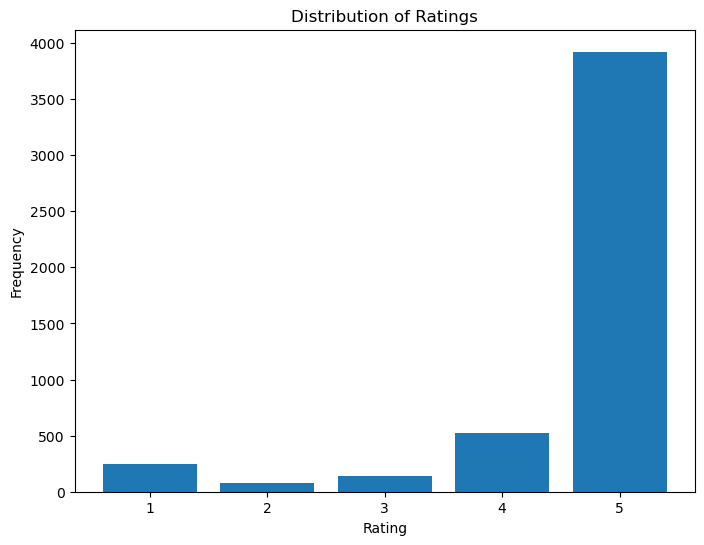

In [107]:
import matplotlib.pyplot as plt
rating_counts = assignment1['overall'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

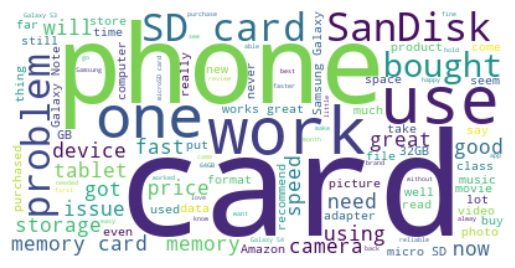

In [108]:
from wordcloud import WordCloud
all_reviews = ' '.join(assignment1["reviewText"])
wordcloud = WordCloud(background_color='white', max_words=100).generate(all_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [109]:
def map_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

assignment1['rating sentiment'] = assignment1['overall'].apply(map_sentiment)

assignment1

,overall,reviewText,rating sentiment
0,5.0,"Purchased this for my device, it worked as adv...",positive
1,4.0,it works as expected. I should have sprung for...,positive
2,5.0,This think has worked out great.Had a diff. br...,positive
3,5.0,"Bought it with Retail Packaging, arrived legit...",positive
4,5.0,It's mini storage. It doesn't do anything els...,positive
...,...,...,...
4908,1.0,I bought this Sandisk 16GB Class 10 to use wit...,negative
4909,5.0,Used this for extending the capabilities of my...,positive
4910,5.0,Great card that is very fast and reliable. It ...,positive
4911,5.0,Good amount of space for the stuff I want to d...,positive


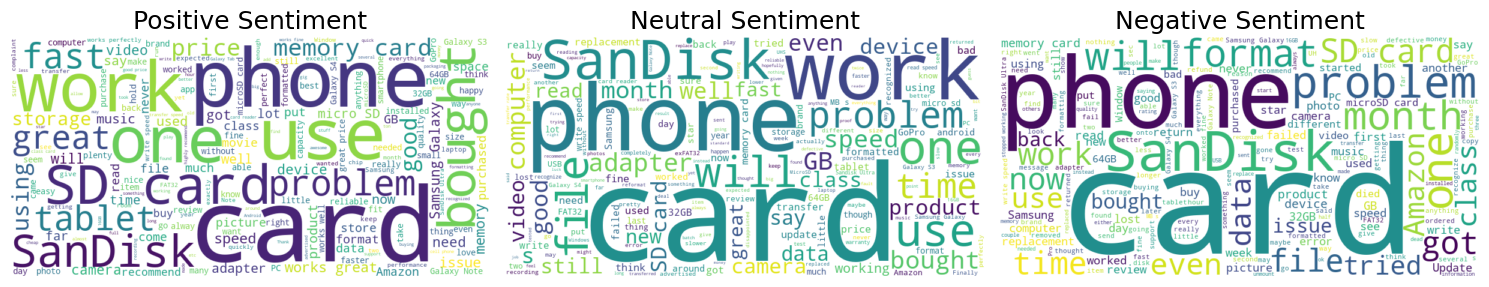

In [111]:
positive_reviews = " ".join(assignment1[assignment1['rating sentiment'] == 'positive']['reviewText'].dropna())
neutral_reviews = " ".join(assignment1[assignment1['rating sentiment'] == 'neutral']['reviewText'].dropna())
negative_reviews = " ".join(assignment1[assignment1['rating sentiment'] == 'negative']['reviewText'].dropna())

# Step 2: Generate WordClouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Step 3: Plot WordClouds
plt.figure(figsize=(15, 10))

# Positive sentiment
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Positive Sentiment", fontsize=18)
plt.axis('off')

# Neutral sentiment
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title("Neutral Sentiment", fontsize=18)
plt.axis('off')

# Negative sentiment
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Sentiment", fontsize=18)
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()

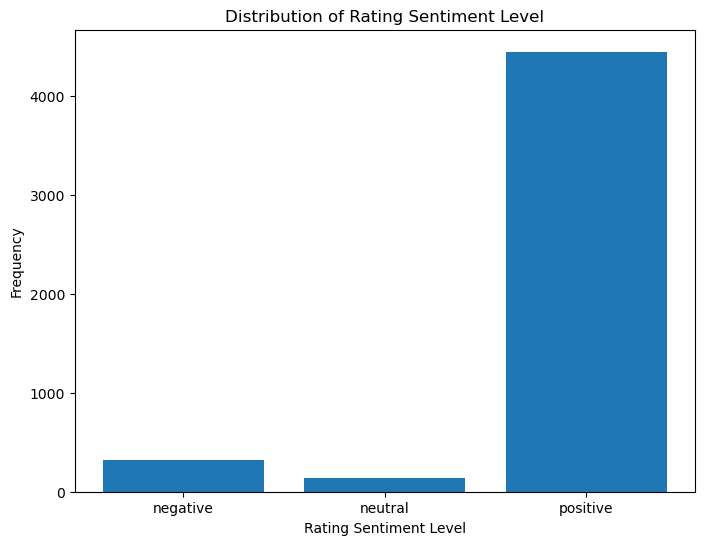

In [112]:
import matplotlib.pyplot as plt
rating_counts = assignment1['rating sentiment'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Distribution of Rating Sentiment Level')
plt.xlabel('Rating Sentiment Level')
plt.ylabel('Frequency')
plt.show()

In [113]:
assignment1['processed_review'] = assignment1["reviewText"].str.lower()

In [116]:
assignment1

,overall,reviewText,rating sentiment,processed_review
0,5.0,"Purchased this for my device, it worked as adv...",positive,"purchased this for my device, it worked as adv..."
1,4.0,it works as expected. I should have sprung for...,positive,it works as expected. i should have sprung for...
2,5.0,This think has worked out great.Had a diff. br...,positive,this think has worked out great.had a diff. br...
3,5.0,"Bought it with Retail Packaging, arrived legit...",positive,"bought it with retail packaging, arrived legit..."
4,5.0,It's mini storage. It doesn't do anything els...,positive,it's mini storage. it doesn't do anything els...
...,...,...,...,...
4908,1.0,I bought this Sandisk 16GB Class 10 to use wit...,negative,i bought this sandisk 16gb class 10 to use wit...
4909,5.0,Used this for extending the capabilities of my...,positive,used this for extending the capabilities of my...
4910,5.0,Great card that is very fast and reliable. It ...,positive,great card that is very fast and reliable. it ...
4911,5.0,Good amount of space for the stuff I want to d...,positive,good amount of space for the stuff i want to d...


In [121]:
import re

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text) 

assignment1['processed_review'] = assignment1['processed_review'].apply(remove_punctuation)

In [123]:
def regrex(text):
    return re.sub(r'\s+', ' ', text)

assignment1['processed_review'] = assignment1['processed_review'].apply(regrex)

In [125]:
import nltk

assignment1['processed_review'] = assignment1['processed_review'].apply(nltk.word_tokenize)

In [126]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(review):
    return [word for word in review if word not in stop_words]

assignment1['processed_review'] = assignment1['processed_review'].apply(remove_stopwords)

In [127]:
from textblob import TextBlob

def correct_spelling_list(reviews):
    return [str(TextBlob(review).correct()) for review in reviews]

assignment1['processed_review'] = assignment1['processed_review'].apply(correct_spelling_list)

In [ ]:
assignment1.to_csv('processed_data.csv', index=False)

In [ ]:
assignment1

In [27]:
processed = pd.read_csv('processed_data.csv')
processed

,overall,reviewText,rating sentiment,processed_review
0,5.0,"Purchased this for my device, it worked as adv...",positive,"['purchased', 'device', 'worked', 'advertised'..."
1,4.0,it works as expected. I should have sprung for...,positive,"['works', 'expected', 'sprung', 'higher', 'cap..."
2,5.0,This think has worked out great.Had a diff. br...,positive,"['think', 'worked', 'breathed', 'if', 'ran', '..."
3,5.0,"Bought it with Retail Packaging, arrived legit...",positive,"['bought', 'retail', 'packing', 'arrived', 'le..."
4,5.0,It's mini storage. It doesn't do anything els...,positive,"['mind', 'storage', 'doesn', 'anything', 'else..."
...,...,...,...,...
4908,1.0,I bought this Sandisk 16GB Class 10 to use wit...,negative,"['bought', 'sands', '16gb', 'class', '10', 'us..."
4909,5.0,Used this for extending the capabilities of my...,positive,"['used', 'extending', 'capabilities', 'samson'..."
4910,5.0,Great card that is very fast and reliable. It ...,positive,"['great', 'card', 'fast', 'reliable', 'comes',..."
4911,5.0,Good amount of space for the stuff I want to d...,positive,"['good', 'amount', 'space', 'stuff', 'want', '..."


In [29]:
import ast

processed['processed_review'] = processed['processed_review'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [30]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

processed['processed_review'] = processed['processed_review'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [32]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

processed['processed_review'] = processed['processed_review'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [33]:
processed

,overall,reviewText,rating sentiment,processed_review
0,5.0,"Purchased this for my device, it worked as adv...",positive,"[purchas, devic, work, advertis, never, much, ..."
1,4.0,it works as expected. I should have sprung for...,positive,"[work, expect, sprung, higher, capac, think, m..."
2,5.0,This think has worked out great.Had a diff. br...,positive,"[think, work, breath, if, ran, 64gb, card, wen..."
3,5.0,"Bought it with Retail Packaging, arrived legit...",positive,"[bought, retail, pack, arriv, left, orang, env..."
4,5.0,It's mini storage. It doesn't do anything els...,positive,"[mind, storag, doesn, anyth, el, suppos, purch..."
...,...,...,...,...
4908,1.0,I bought this Sandisk 16GB Class 10 to use wit...,negative,"[bought, sand, 16gb, class, 10, use, etc, insp..."
4909,5.0,Used this for extending the capabilities of my...,positive,"[use, extend, capabl, samson, galaxi, note, 10..."
4910,5.0,Great card that is very fast and reliable. It ...,positive,"[great, card, fast, reliabl, come, option, ada..."
4911,5.0,Good amount of space for the stuff I want to d...,positive,"[good, amount, space, stuff, want, fit, pro, say]"


In [34]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk import ngrams

def generate_ngrams(text, n=2):
    return list(ngrams(text, n))

processed['bigrams'] = processed['processed_review'].apply(lambda x: generate_ngrams(x, 2))
processed['trigrams'] = processed['processed_review'].apply(lambda x: generate_ngrams(x, 3))

In [35]:
bigrams_positive = processed[processed['rating sentiment'] == 'positive']['bigrams'].sum()
bigrams_negative = processed[processed['rating sentiment'] == 'negative']['bigrams'].sum()

trigrams_positive = processed[processed['rating sentiment'] == 'positive']['trigrams'].sum()
trigrams_negative = processed[processed['rating sentiment'] == 'negative']['trigrams'].sum()

bigrams_positive_freq = Counter(bigrams_positive)
bigrams_negative_freq = Counter(bigrams_negative)

trigrams_positive_freq = Counter(trigrams_positive)
trigrams_negative_freq = Counter(trigrams_negative)

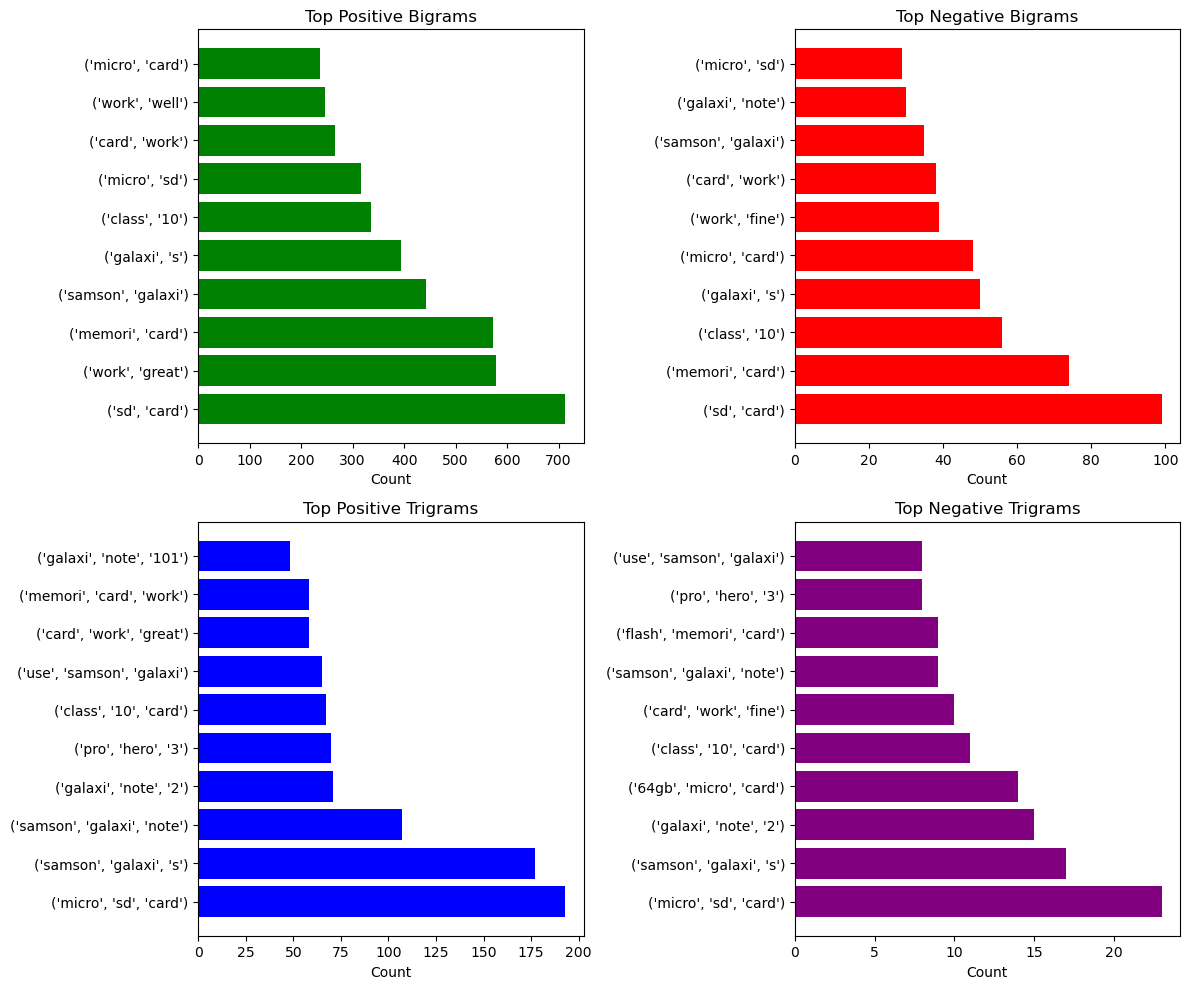

In [41]:
import matplotlib.pyplot as plt

pos_bigram = pd.DataFrame(bigrams_positive_freq.most_common(10), columns=['Bigram', 'Count'])
neg_bigram = pd.DataFrame(bigrams_negative_freq.most_common(10), columns=['Bigram', 'Count'])

pos_trigram = pd.DataFrame(trigrams_positive_freq.most_common(10), columns=['Trigram', 'Count'])
neg_trigram = pd.DataFrame(trigrams_negative_freq.most_common(10), columns=['Trigram', 'Count'])

plt.figure(figsize=(12, 10))

# Plot positive bigrams
plt.subplot(2, 2, 1)
plt.barh(pos_bigram['Bigram'].astype(str), pos_bigram['Count'], color='green')
plt.title('Top Positive Bigrams')
plt.xlabel('Count')

# Plot negative bigrams
plt.subplot(2, 2, 2)
plt.barh(neg_bigram['Bigram'].astype(str), neg_bigram['Count'], color='red')
plt.title('Top Negative Bigrams')
plt.xlabel('Count')

# Plot positive trigrams
plt.subplot(2, 2, 3)
plt.barh(pos_trigram['Trigram'].astype(str), pos_trigram['Count'], color='blue')
plt.title('Top Positive Trigrams')
plt.xlabel('Count')

# Plot negative trigrams
plt.subplot(2, 2, 4)
plt.barh(neg_trigram['Trigram'].astype(str), neg_trigram['Count'], color='purple')
plt.title('Top Negative Trigrams')
plt.xlabel('Count')

plt.tight_layout()
plt.show()


In [45]:
processed['join_processed_review'] = processed['processed_review'].apply(lambda x: ' '.join(x))

In [133]:
processed

,overall,reviewText,rating sentiment,processed_review,bigrams,trigrams,join_processed_review,sentiment_label
0,5.0,"Purchased this for my device, it worked as adv...",positive,"[purchas, devic, work, advertis, never, much, ...","[(purchas, devic), (devic, work), (work, adver...","[(purchas, devic, work), (devic, work, adverti...",purchas devic work advertis never much phone m...,2
1,4.0,it works as expected. I should have sprung for...,positive,"[work, expect, sprung, higher, capac, think, m...","[(work, expect), (expect, sprung), (sprung, hi...","[(work, expect, sprung), (expect, sprung, high...",work expect sprung higher capac think made bit...,2
2,5.0,This think has worked out great.Had a diff. br...,positive,"[think, work, breath, if, ran, 64gb, card, wen...","[(think, work), (work, breath), (breath, if), ...","[(think, work, breath), (work, breath, if), (b...",think work breath if ran 64gb card went south ...,2
3,5.0,"Bought it with Retail Packaging, arrived legit...",positive,"[bought, retail, pack, arriv, left, orang, env...","[(bought, retail), (retail, pack), (pack, arri...","[(bought, retail, pack), (retail, pack, arriv)...",bought retail pack arriv left orang envelop en...,2
4,5.0,It's mini storage. It doesn't do anything els...,positive,"[mind, storag, doesn, anyth, el, suppos, purch...","[(mind, storag), (storag, doesn), (doesn, anyt...","[(mind, storag, doesn), (storag, doesn, anyth)...",mind storag doesn anyth el suppos purchas add ...,2
...,...,...,...,...,...,...,...,...
4908,1.0,I bought this Sandisk 16GB Class 10 to use wit...,negative,"[bought, sand, 16gb, class, 10, use, etc, insp...","[(bought, sand), (sand, 16gb), (16gb, class), ...","[(bought, sand, 16gb), (sand, 16gb, class), (1...",bought sand 16gb class 10 use etc inspir 3 mon...,0
4909,5.0,Used this for extending the capabilities of my...,positive,"[use, extend, capabl, samson, galaxi, note, 10...","[(use, extend), (extend, capabl), (capabl, sam...","[(use, extend, capabl), (extend, capabl, samso...",use extend capabl samson galaxi note 10 greatl...,2
4910,5.0,Great card that is very fast and reliable. It ...,positive,"[great, card, fast, reliabl, come, option, ada...","[(great, card), (card, fast), (fast, reliabl),...","[(great, card, fast), (card, fast, reliabl), (...",great card fast reliabl come option adapt sd s...,2
4911,5.0,Good amount of space for the stuff I want to d...,positive,"[good, amount, space, stuff, want, fit, pro, say]","[(good, amount), (amount, space), (space, stuf...","[(good, amount, space), (amount, space, stuff)...",good amount space stuff want fit pro say,2


In [135]:
processed.to_csv('processed_data.csv', index=False)